In [10]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

from skimage import data
from skimage.registration import phase_cross_correlation
from skimage.registration._phase_cross_correlation import _upsampled_dft
from scipy.ndimage import fourier_shift

In [18]:
img1 = load_npy_files("/data/new_trap/20200809/Bead1/Discharge/Pictures/Discharge*")

/data/new_trap/20200809/Bead1/Discharge/Pictures/Discharge_0.npy 0
/data/new_trap/20200809/Bead1/Discharge/Pictures/Discharge_1.npy 1
/data/new_trap/20200809/Bead1/Discharge/Pictures/Discharge_2.npy 2
/data/new_trap/20200809/Bead1/Discharge/Pictures/Discharge_3.npy 3
/data/new_trap/20200809/Bead1/Discharge/Pictures/Discharge_4.npy 4
/data/new_trap/20200809/Bead1/Discharge/Pictures/Discharge_5.npy 5
/data/new_trap/20200809/Bead1/Discharge/Pictures/Discharge_6.npy 6
/data/new_trap/20200809/Bead1/Discharge/Pictures/Discharge_7.npy 7
/data/new_trap/20200809/Bead1/Discharge/Pictures/Discharge_8.npy 8
/data/new_trap/20200809/Bead1/Discharge/Pictures/Discharge_9.npy 9
/data/new_trap/20200809/Bead1/Discharge/Pictures/Discharge_10.npy 10
/data/new_trap/20200809/Bead1/Discharge/Pictures/Discharge_11.npy 11
/data/new_trap/20200809/Bead1/Discharge/Pictures/Discharge_12.npy 12
/data/new_trap/20200809/Bead1/Discharge/Pictures/Discharge_13.npy 13
/data/new_trap/20200809/Bead1/Discharge/Pictures/Disch

In [72]:
start = time.time()
shift_z2 = []
argmax = []
for i in np.arange(0,100,1):
   # # pixel precision first
   # shift, error, diffphase = phase_cross_correlation(img1[0], img1[i])
   # # Show the output of a cross-correlation to show what the algorithm is
   # # doing behind the scenes

   # print(f"Detected pixel offset (y, x): {shift}")
    argmax.append(np.argmax(np.mean(img1[i],axis=1)))
    # subpixel precision
    shift, error, diffphase = phase_cross_correlation(img1[1], img1[i],
                                                      upsample_factor=5000)
    shift_z2.append(shift[0])
end = time.time()
print(end-start)

432.0639328956604


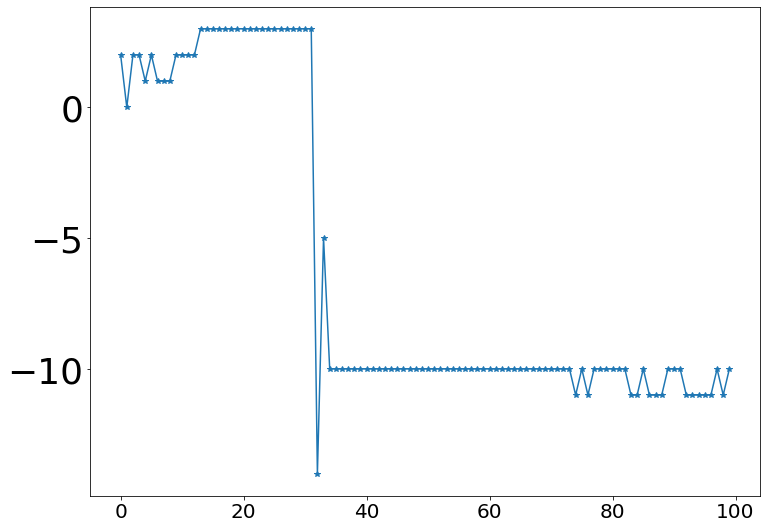

In [73]:
plt.plot(-(argmax-argmax[1]),marker="*")
plt.plot(shift_z,marker="*")
plt.plot(shift_z2,marker="*")


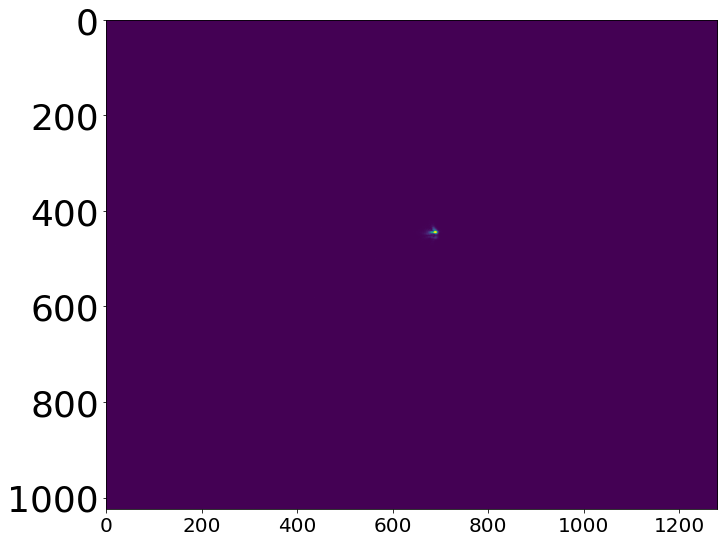

In [57]:
plt.imshow(img1[41])

AttributeError: 'Line2D' object has no property 'markerstyle'

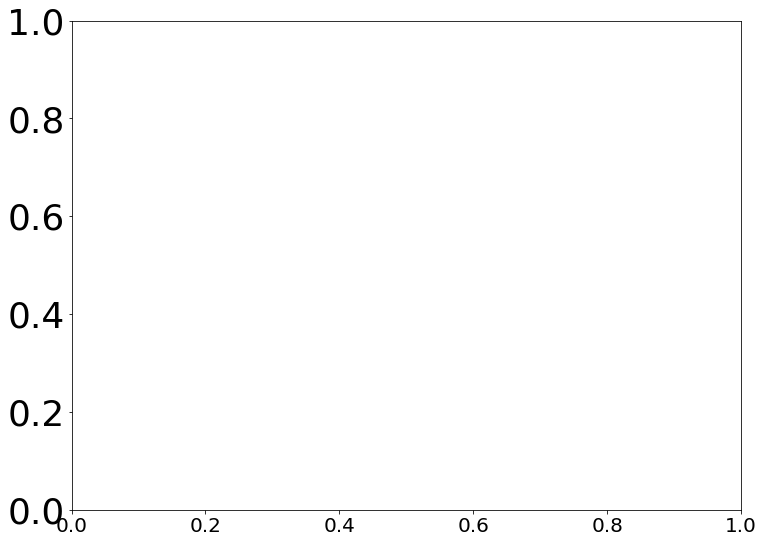

In [35]:
plt.plot(np.transpose(shift_z)[0],markerstyle="*")

In [23]:
shift[0]

-12.0

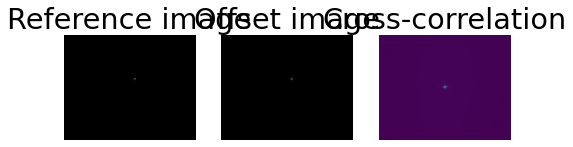

Detected pixel offset (y, x): [-1.  0.]


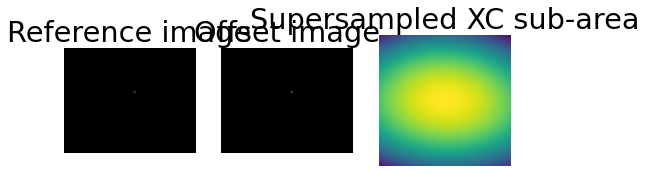

Detected subpixel offset (y, x): [-0.97 -0.09]


In [19]:
# pixel precision first
shift, error, diffphase = phase_cross_correlation(img1[0], img1[1])

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1)
ax3 = plt.subplot(1, 3, 3)

ax1.imshow(img1[0], cmap='gray')
ax1.set_axis_off()
ax1.set_title('Reference image')

ax2.imshow(img1[1], cmap='gray')
ax2.set_axis_off()
ax2.set_title('Offset image')

# Show the output of a cross-correlation to show what the algorithm is
# doing behind the scenes
image_product = np.fft.fft2(img1[0]) * np.fft.fft2(img1[1]).conj()
cc_image = np.fft.fftshift(np.fft.ifft2(image_product))
ax3.imshow(cc_image.real)
ax3.set_axis_off()
ax3.set_title("Cross-correlation")

plt.show()

print(f"Detected pixel offset (y, x): {shift}")

# subpixel precision
shift, error, diffphase = phase_cross_correlation(img1[0], img1[1],
                                                  upsample_factor=100)

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1)
ax3 = plt.subplot(1, 3, 3)

ax1.imshow(img1[0], cmap='gray')
ax1.set_axis_off()
ax1.set_title('Reference image')

ax2.imshow(img1[1].real, cmap='gray')
ax2.set_axis_off()
ax2.set_title('Offset image')

# Calculate the upsampled DFT, again to show what the algorithm is doing
# behind the scenes.  Constants correspond to calculated values in routine.
# See source code for details.
cc_image = _upsampled_dft(image_product, 150, 100, (shift*100)+75).conj()
ax3.imshow(cc_image.real)
ax3.set_axis_off()
ax3.set_title("Supersampled XC sub-area")


plt.show()

print(f"Detected subpixel offset (y, x): {shift}")